<a href="https://colab.research.google.com/github/roguxivlo/machine-learning-24L/blob/main/hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scenario A Derivation

\begin{align*}
&\frac{\partial}{\partial \lambda}\sum_{i=1}^{n} L(y_i, \lambda) = 
\sum_{i=1}^{n}\frac{\partial}{\partial \lambda} L(y_i, \lambda) = 
\sum_{i=1}^{n}\frac{\partial}{\partial \lambda} \left( -y_i \log(\sigma(\lambda)) - (1 - y_i) \log(1 - \sigma(\lambda)) \right) = \\
&=\sum_{i=1}^{n}
    \left( 
        -y_i \frac{\partial}{\partial \lambda} \log(\sigma(\lambda)) - (1-y_i)\frac{\partial}{\partial \lambda}\log(1 - \sigma(\lambda)) 
    \right) =\\
&= \frac{\partial}{\partial \lambda} \log(\sigma(\lambda)) \sum_{i=1}^{n} -y_i 
- \frac{\partial}{\partial \lambda}\log(1 - \sigma(\lambda))\sum_{i=1}^{n} (1-y_i) = \\
& = -m\frac{\partial}{\partial \lambda} \log(\sigma(\lambda))
- k \frac{\partial}{\partial \lambda}\log(1 - \sigma(\lambda))= \\
 &= -m \frac{1}{\sigma(\lambda)}\frac{\partial}{\partial \lambda}\sigma(\lambda)
+ k \frac{1}{1 - \sigma(\lambda)}\frac{\partial}{\partial \lambda}\sigma(\lambda)= \\
&= -m \frac{1}{\sigma(\lambda)}\sigma(\lambda)(1-\sigma(\lambda))
+ k \frac{1}{1 - \sigma(\lambda)}\sigma(\lambda)(1-\sigma(\lambda))= \\
&= -m (1-\sigma(\lambda))
+ k \sigma(\lambda) = \sigma(\lambda)(k+m) - m
\end{align*}

Setting the derivative to $0$ and solving for $\lambda$ we obtain:

\begin{align*}
& \sigma(\lambda)(k+m) - m = 0\\
& \sigma(\lambda) = \frac{m}{k+m} \\
& \frac{1}{1+\exp(-\lambda)} = \frac{m}{k+m} \\
& k+m = m + m\exp(-\lambda)\\
&-\lambda = \log \frac{k}{m}\\
& \lambda = \log \frac{m}{k}
\end{align*}

The function we are concerned with is convex, hence this critical point is also a minimum.

The constant $\lambda$ is the log-odds of ones in the dataset. This makes sense, since we used sigmoid function.

# Scenario B derivation

Let $z_i​=f_i​+\lambda$,  $\frac{\partial z_i}{\partial\lambda}​=1$

\begin{align*}
&\frac{\partial}{\partial\lambda} \sum_{i=1}^n L(y_i, z_i) = 
\sum_{i=1}^n \frac{\partial}{\partial\lambda} -y_i\log(\sigma(z_i)) - (1-y_i)(\log(1-\sigma(z_i))) = \\
& = \sum_{i=1}^n -y_i \frac{1}{\sigma(z_i)}\sigma'(z_i) - (1-y_i)\frac{-1}{1-\sigma(z_i) }\sigma'(z_i) = \\
& =\sum_{i=1}^n -y_i (1-\sigma(z_i)) + (1-y_i)\sigma(z_i) = \sum_{i=1}^n -y_i + \sigma(z_i)
\end{align*}

Setting derivative to $0$, we obtain the equation:
$$
\sum_{i=1}^n \sigma(f_i + \lambda) = m
$$

We cannot solve for $\lambda$ explicitly.

In [32]:
import numpy as np

np.random.seed(42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(y, z):
    return -y * np.log(sigmoid(z)) - (1-y)*np.log(1 - sigmoid(z))

N = 15
# zeroes count
k = 3
# ones count
m = N - k
# WLOG assume that first k are zeroes, the rest are ones
y = np.zeros(N)
y[k:] = 1

# f_i predictions
preds = np.random.normal(size=N)


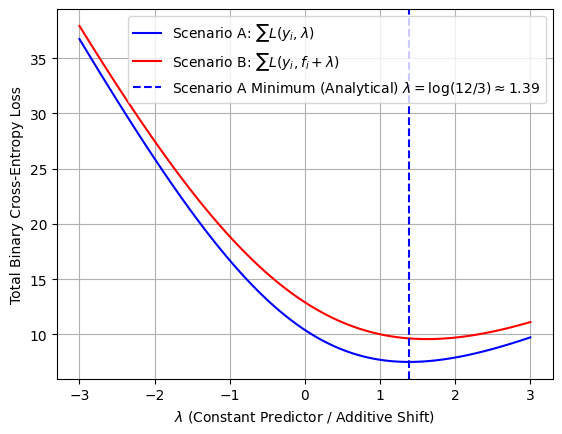

In [33]:
import matplotlib.pyplot as plt

# Scenario A:
# plot the sum { loss(y_i, \lambda)}

lambda_vals = np.linspace(-3, 3, num=100)

def scenarioA(y, lambda_vals):
    return loss(y[:, None], lambda_vals)

loss_vals_broadcasted = scenarioA(y, lambda_vals)

scenarioA_vals = np.sum(loss_vals_broadcasted, axis=0)
min_A_analytical = np.log(m / k)


# Scenario B:
# plot the sum { loss(y_i, f_i + \lambda)}

def scenarioB(y, preds, lambda_vals):
    return loss(y[:, None], preds[:, None] + lambda_vals)

loss_vals_broadcasted = scenarioB(y,preds,  lambda_vals)

scenarioB_vals = np.sum(loss_vals_broadcasted, axis=0)


plt.plot(lambda_vals, scenarioA_vals, label='Scenario A: $\sum L(y_i, \lambda)$', color='blue')
plt.plot(lambda_vals, scenarioB_vals, label='Scenario B: $\sum L(y_i, f_i + \lambda)$', color='red')
plt.xlabel("$\lambda$ (Constant Predictor / Additive Shift)")
plt.ylabel("Total Binary Cross-Entropy Loss")
plt.axvline(min_A_analytical, color='blue', linestyle='--', label=f'Scenario A Minimum (Analytical) $\lambda = \log({m}/{k}) \\approx {min_A_analytical:.2f}$')
plt.grid(True)
plt.legend()
plt.show()

# Plot analysis

We can observe that both curves are convex, and hence unimodal.
Therefore, even if we don't know the analytical solution for $\lambda$ in
scenario B, we can approximate it numerically.

The hardness of scenario $B$ lies in the fact that there's no closed form solution
for $\lambda$. Nevertheless, computational landscape is the same (both scenarios produce
convex functions with one minimum)